# Numerical Stability and Initialization

Until now, all models have required that we initialise the parameters of our networks, but we haven't spent an especially long time examining these decisions. Initialisation is important for neural network learning and should be given proper attention. Making the correct choice can be essential for achieving numerical stability. 

These choices can also be tied up with the choice of activation function, and poor choices can cause us to encounter exploding or vanishing gradients.

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

## Vanishing and Exploding Gradients

When computing our gradients, we are susceptible to many of the problems which often crop up when multiplying large numbers of probabilites together, that we may encounter numerical underflow. When dealing with probabilities we typically instead deal with the log probability. Unfortunately, in this situation the problem is more serious, as the values may be very large or very small. Gradients of unpredictable magnitude may lead to a whole host of issues with our optimisation algorithm, including; very large gradients causing extremely large steps, blowing up our model, or ver small steps, almost no change at all, resulting from very small (vanishing) gradients. 

### Vanishing Gradients

One common cause of vanishing gradients is the choice of activation function, particularly the Sigmoid function, which was popular historically in earlier machine learning models due to its similarity to biological neuron activation (either on or off, no in between).

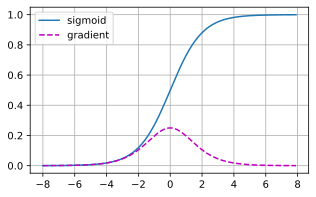

In [3]:
x = torch.arange(-8, 8, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach(), [y.detach().numpy(), x.grad.numpy()], legend=['sigmoid', 'gradient'], figsize=(5, 3))

The sigmoid activation function's gradients vanish when the inputs are very large and very small. Generally, unless the inputs are in the "goldilocks zone" (from the image, roughly -4 to 4) the overall product might vanish. Indeed, this was an issue which used to plague deep network training. 

This is a major reason why ReLU activation units have arisen as a more stable (though less neurologically plausible) activation function in modern models.

### Exploding Gradients

THe opposite problem can be equally challenging, if we randomly make 100 matrices drawn from a gaussian distribution and multiply these together, the size of the products rapidly explodes despite the individfual elements not being too large. If we we to initialise a machine learning model with values like this, we would not have any hope of getting something to meaningfully converge.

In [8]:
M = torch.normal(0, 1, size=(4, 4))

print(f"A single matrix: \n {M=}")

for i in range(100):
    M = M @ torch.normal(0, 1, size=(4, 4))

print(f"After multiplying 100 matrices: \n {M=}")

A single matrix: 
 M=tensor([[-1.6574,  0.2598, -0.6940,  1.0406],
        [-0.3470, -0.0420,  0.0023, -1.7480],
        [-0.1121,  0.4305, -0.8623, -0.5664],
        [ 0.6441,  1.5856, -1.0409, -0.4921]])
After multiplying 100 matrices: 
 M=tensor([[ 2.5164e+24, -1.8747e+24,  2.9552e+24, -1.6640e+24],
        [-2.8680e+24,  2.1366e+24, -3.3680e+24,  1.8964e+24],
        [-1.7027e+23,  1.2685e+23, -1.9996e+23,  1.1259e+23],
        [-1.7556e+24,  1.3079e+24, -2.0618e+24,  1.1609e+24]])


###  Breaking the Symmetry

Symmetry inherent in the design of networks can cause problems when the gradients are all the same, resulting in statonary poitns in the optimsiation space which require special methods (like dropout regularisation) to break out of. 

## Parameter Initialization

Careful initialization can mitigate the issues above

### Defaul Initialization

If we don't specify an initialisation, the framework will use a defaul random initialisation, which can work well for modestly sized models

### Xavier Initialization

Xavier initialisation samples initial weights from a Gaussian distribution with the variance defined by the number of input and output units:

$$ \sigma^{2} = \frac{2}{n_{in} + n_{out}}$$

Xavier initialisation turns out to work well in practise.

### Beyond

Parameter initialisation is a complex and active field of current research, with modern frameworks implementing dozens of different initialisation methods. 

Vanishing and exploding gradients are common issues in deep networks

Great care must be taken when initialising parameters to prevent this

parameters must be initialized randomly to break symmetry

xavier initialization is a beneficial implementatiomn of these requiements. 

ReLU activation functions effectively combat the vanishing gradients problem, accelerating convergence. 